# **Experiment 1: Logistic Regression**

__Steps__:
1. Load and explore datasets
2. Data preparation
3. Data Splitting
4. Assess baseline model
5. Cross-validation with unregularized model 
6. Hyperparameter tuning with GridSearch 
7. Select the best threshold for the best model 
8. Assess the best Logistic Regression Model on testing set

## **1. Load and explore datasets** 

**[1.1]** Import packages

In [1]:
import pandas as pd
import math 
import numpy as np

# train test split
from sklearn.model_selection import train_test_split

# performance metrics
from sklearn.metrics import fbeta_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve

# classifier
from sklearn.linear_model import LogisticRegression

# cross validation 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

# visualization
import matplotlib.pyplot as plt
import altair as alt
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

**[1.2]** Load the dataset into dataframe called df

In [2]:
df = pd.read_csv('./repurchase_training.csv')

**[1.3]** Display the first 5 rows of df

In [3]:
df.head()

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,1,0,3. 35 to 44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,2,0,NaN,NaN,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,3,0,NaN,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,5,0,NaN,NaN,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,6,0,NaN,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9


**[1.4]** Display the last 5 rows of df

In [4]:
df.tail()

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
131332,154134,1,NaN,NaN,model_3,Large/SUV,7,10,10,9,10,10,10,3,6,10,10
131333,154135,1,NaN,NaN,model_3,Large/SUV,4,10,10,10,10,10,10,2,3,10,10
131334,154137,1,NaN,NaN,model_5,Large/SUV,4,4,9,5,4,3,8,4,7,10,10
131335,154138,1,NaN,NaN,model_5,Large/SUV,2,1,10,1,10,9,8,3,6,7,10
131336,154139,1,NaN,NaN,model_1,LCV,6,1,7,1,10,10,5,3,4,9,10


**[1.5]** Display the dimension (shape) of df

In [5]:
df_n_rows = df.shape[0]
df_n_cols = df.shape[1]
print("Number of rows: ", df_n_rows)
print("Number of cols: ", df_n_cols)

Number of rows:  131337
Number of cols:  17


**[1.6]** Display the list of columns of df

In [6]:
df.columns

Index(['ID', 'Target', 'age_band', 'gender', 'car_model', 'car_segment',
       'age_of_vehicle_years', 'sched_serv_warr', 'non_sched_serv_warr',
       'sched_serv_paid', 'non_sched_serv_paid', 'total_paid_services',
       'total_services', 'mth_since_last_serv', 'annualised_mileage',
       'num_dealers_visited', 'num_serv_dealer_purchased'],
      dtype='object')

**[1.7]** Display the descriptive statistics of df

In [7]:
df.describe()

,ID,Target,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
count,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000
mean,77097.384180,0.026809,5.493022,5.452500,5.472517,5.452287,5.497050,5.481692,5.454967,5.469807,5.502836,5.485438,5.480778
std,44501.636704,0.161525,2.843299,2.884328,2.870665,2.886528,2.878699,2.880408,2.875961,2.859756,2.854896,2.876772,2.867524
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,38563.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,77132.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,115668.000000,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,154139.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


**[1.8]** Display the summary (info) of df

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131337 entries, 0 to 131336
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         131337 non-null  int64 
 1   Target                     131337 non-null  int64 
 2   age_band                   18962 non-null   object
 3   gender                     62029 non-null   object
 4   car_model                  131337 non-null  object
 5   car_segment                131337 non-null  object
 6   age_of_vehicle_years       131337 non-null  int64 
 7   sched_serv_warr            131337 non-null  int64 
 8   non_sched_serv_warr        131337 non-null  int64 
 9   sched_serv_paid            131337 non-null  int64 
 10  non_sched_serv_paid        131337 non-null  int64 
 11  total_paid_services        131337 non-null  int64 
 12  total_services             131337 non-null  int64 
 13  mth_since_last_serv        131337 non-null  

**[1.9]** Car model frequency

In [9]:
# group samples by car_model then count samples of each group
car_model_count = df.groupby('car_model').size().reset_index(name = 'count')
# calculate the percentage from count
car_model_count['percentage'] = car_model_count['count'] / sum(car_model_count['count']) * 100
# sort by percentage (ascending)
car_model_count = car_model_count.sort_values(by = 'percentage')
car_model_count

,car_model,count,percentage
10,model_19,2,0.001523
5,model_14,78,0.059389
9,model_18,101,0.076901
7,model_16,114,0.086800
8,model_17,153,0.116494
6,model_15,334,0.254308
2,model_11,612,0.465977
3,model_12,614,0.467500
4,model_13,714,0.543640
18,model_9,994,0.756832


In [10]:
# display frequency distribution of car_model
alt.data_transformers.disable_max_rows()
alt.Chart(car_model_count).mark_bar().encode(
    alt.X("car_model"),
    alt.Y('count'),
    tooltip=['count']
).interactive()

alt.Chart(...)

In [11]:
# Top 6 infrequent car models 
infrequent_car_model = list(car_model_count.head(6)['car_model'])
infrequent_car_model

['model_19', 'model_14', 'model_18', 'model_16', 'model_17', 'model_15']

**[1.10]** Car segment frequency

In [12]:
# group samples by car_segment then count samples of each group
car_segment_count = df.groupby('car_segment').size().reset_index(name = 'count')
# calculate the percentage from count
car_segment_count['percentage'] = car_segment_count['count'] / sum(car_segment_count['count']) * 100
car_segment_count

,car_segment,count,percentage
0,LCV,24606,18.735010
1,Large/SUV,52120,39.684171
2,Other,58,0.044161
3,Small/Medium,54553,41.536658


In [13]:
# display frequency distribution of car_segment
alt.Chart(car_segment_count).mark_bar().encode(
    alt.X("car_segment"),
    alt.Y('count'),
    tooltip=['count']
).interactive()

alt.Chart(...)

**[1.11]** Target 0 samples

In [14]:
df[df['Target'] == 0]

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,1,0,3. 35 to 44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,2,0,NaN,NaN,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,3,0,NaN,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,5,0,NaN,NaN,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,6,0,NaN,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127811,149991,0,NaN,Male,model_5,Large/SUV,1,1,2,2,1,1,2,2,2,1,3
127812,149992,0,NaN,Male,model_5,Large/SUV,8,8,8,9,4,7,8,6,9,10,8
127813,149996,0,NaN,Female,model_5,Large/SUV,7,4,9,9,6,8,7,3,10,10,4
127814,149997,0,NaN,NaN,model_2,Small/Medium,9,9,10,9,8,8,10,7,6,10,2


**[1.12]** Target 1 samples

In [15]:
df[df['Target'] == 1]

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
127816,150002,1,NaN,Male,model_5,Large/SUV,3,1,4,2,9,8,2,4,5,1,1
127817,150004,1,NaN,Female,model_2,Small/Medium,1,5,7,5,6,5,6,2,6,1,1
127818,150006,1,NaN,NaN,model_2,Small/Medium,3,3,7,4,8,6,4,3,3,1,1
127819,150007,1,NaN,NaN,model_3,Large/SUV,4,2,2,2,1,2,1,3,2,1,1
127820,150008,1,NaN,Male,model_3,Large/SUV,3,1,5,1,9,8,3,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131332,154134,1,NaN,NaN,model_3,Large/SUV,7,10,10,9,10,10,10,3,6,10,10
131333,154135,1,NaN,NaN,model_3,Large/SUV,4,10,10,10,10,10,10,2,3,10,10
131334,154137,1,NaN,NaN,model_5,Large/SUV,4,4,9,5,4,3,8,4,7,10,10
131335,154138,1,NaN,NaN,model_5,Large/SUV,2,1,10,1,10,9,8,3,6,7,10


## **2. Data preparation**

**[2.1]** Create a copy of training set

In [16]:
df_cleaned = df.copy()

**[2.2]** Identify duplicates

In [17]:
df_cleaned[df_cleaned.duplicated()]

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased


**[2.3]** Drop missing value columns

In [18]:
df_cleaned.drop(['age_band', 'gender', 'ID'], axis=1, inplace=True)

**[2.4]** Scale numeric columns

In [19]:
df_cleaned = df_cleaned.apply(lambda x: (x - x.mean()) / x.std() if x.dtype in ['int64', 'float64'] and x.name != 'Target' else x, axis=0)

**[2.5]** One hot encoding car_segment

In [20]:
# Perform one-hot encoding on car_segment
car_segment_ohe = pd.get_dummies(df_cleaned[['car_segment']])
car_segment_ohe

,car_segment_LCV,car_segment_Large/SUV,car_segment_Other,car_segment_Small/Medium
0,1,0,0,0
1,0,0,0,1
2,0,1,0,0
3,0,1,0,0
4,0,0,0,1
...,...,...,...,...
131332,0,1,0,0
131333,0,1,0,0
131334,0,1,0,0
131335,0,1,0,0


In [21]:
# concatnate df_cleaned and car_segment_ohe
df_cleaned = pd.concat([df_cleaned, car_segment_ohe], axis=1)
df_cleaned

,Target,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased,car_segment_LCV,car_segment_Large/SUV,car_segment_Other,car_segment_Small/Medium
0,0,model_1,LCV,1.233419,-1.196986,1.577155,-0.849563,0.522094,-0.167231,0.189513,1.234439,0.874695,1.569315,-0.516396,1,0,0,0
1,0,model_2,Small/Medium,0.178306,1.576624,-0.861305,1.575496,-0.520044,1.221462,1.580353,0.185398,1.575246,0.526480,1.576001,0,0,0,1
2,0,model_3,Large/SUV,1.233419,1.576624,1.228803,1.575496,1.216852,1.568635,1.580353,0.535078,1.575246,0.178868,1.576001,0,1,0,0
3,0,model_3,Large/SUV,-0.173398,0.883221,-0.164602,0.882622,-0.520044,-0.167231,0.189513,-0.513962,1.575246,1.221703,0.529803,0,1,0,0
4,0,model_2,Small/Medium,0.881715,1.229922,-0.512953,1.575496,0.522094,1.221462,0.884933,-0.164282,-0.526407,-0.516356,1.227268,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131332,1,model_3,Large/SUV,0.530011,1.576624,1.577155,1.229059,1.564231,1.568635,1.580353,-0.863643,0.174144,1.569315,1.576001,0,1,0,0
131333,1,model_3,Large/SUV,-0.525102,1.576624,1.577155,1.575496,1.564231,1.568635,1.580353,-1.213323,-0.876682,1.569315,1.576001,0,1,0,0
131334,1,model_5,Large/SUV,-0.525102,-0.503584,1.228803,-0.156689,-0.520044,-0.861577,0.884933,-0.513962,0.524420,1.569315,1.576001,0,1,0,0
131335,1,model_5,Large/SUV,-1.228510,-1.543687,1.577155,-1.542437,1.564231,1.221462,0.884933,-0.863643,0.174144,0.526480,1.576001,0,1,0,0


**[2.6]** One hot encoding car_model

In [22]:
# group infrequent car model into Other group
df_cleaned['car_model'] = df_cleaned['car_model'].apply(lambda r: 'other' if r in infrequent_car_model else r)

In [23]:
# Perform one-hot encoding on car_model 
car_model_ohe = pd.get_dummies(df_cleaned[['car_model']])
car_model_ohe

,car_model_model_1,car_model_model_10,car_model_model_11,car_model_model_12,car_model_model_13,car_model_model_2,car_model_model_3,car_model_model_4,car_model_model_5,car_model_model_6,car_model_model_7,car_model_model_8,car_model_model_9,car_model_other
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131332,0,0,0,0,0,0,1,0,0,0,0,0,0,0
131333,0,0,0,0,0,0,1,0,0,0,0,0,0,0
131334,0,0,0,0,0,0,0,0,1,0,0,0,0,0
131335,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [24]:
# concatnate df_cleaned and car_model
df_cleaned = pd.concat([df_cleaned, car_model_ohe], axis=1)
df_cleaned

,Target,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,...,car_model_model_13,car_model_model_2,car_model_model_3,car_model_model_4,car_model_model_5,car_model_model_6,car_model_model_7,car_model_model_8,car_model_model_9,car_model_other
0,0,model_1,LCV,1.233419,-1.196986,1.577155,-0.849563,0.522094,-0.167231,0.189513,...,0,0,0,0,0,0,0,0,0,0
1,0,model_2,Small/Medium,0.178306,1.576624,-0.861305,1.575496,-0.520044,1.221462,1.580353,...,0,1,0,0,0,0,0,0,0,0
2,0,model_3,Large/SUV,1.233419,1.576624,1.228803,1.575496,1.216852,1.568635,1.580353,...,0,0,1,0,0,0,0,0,0,0
3,0,model_3,Large/SUV,-0.173398,0.883221,-0.164602,0.882622,-0.520044,-0.167231,0.189513,...,0,0,1,0,0,0,0,0,0,0
4,0,model_2,Small/Medium,0.881715,1.229922,-0.512953,1.575496,0.522094,1.221462,0.884933,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131332,1,model_3,Large/SUV,0.530011,1.576624,1.577155,1.229059,1.564231,1.568635,1.580353,...,0,0,1,0,0,0,0,0,0,0
131333,1,model_3,Large/SUV,-0.525102,1.576624,1.577155,1.575496,1.564231,1.568635,1.580353,...,0,0,1,0,0,0,0,0,0,0
131334,1,model_5,Large/SUV,-0.525102,-0.503584,1.228803,-0.156689,-0.520044,-0.861577,0.884933,...,0,0,0,0,1,0,0,0,0,0
131335,1,model_5,Large/SUV,-1.228510,-1.543687,1.577155,-1.542437,1.564231,1.221462,0.884933,...,0,0,0,0,1,0,0,0,0,0


**[2.7]** Drop columns 

In [25]:
df_cleaned.drop(['car_model', 'car_segment'], axis=1, inplace=True)

## 3. Data Splitting

**[3.1]** Extract the target variable into a variable called y and convert its type to category

In [26]:
y = df_cleaned.pop('Target')
y = y.astype('category')

**[3.2]** Create a variable called X that contains all the independent variables

In [27]:
X = df_cleaned

**[3.3]** Print the frequencies of each value of the target variable

In [28]:
y.value_counts(normalize=True)

0    0.973191
1    0.026809
Name: Target, dtype: float64

**[3.4]** Split randomly the dataset into 2 different sets: data (80%) and test (20%) with random_state=42 and stratify=y

In [29]:
X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**[3.5]** Print the frequencies of each value of the target variable from the testing set

In [30]:
y_test.value_counts(normalize=True)

0    0.973199
1    0.026801
Name: Target, dtype: float64

**[3.6]** Instantiate a StratifiedKFold with 3 splits

In [31]:
skf = StratifiedKFold(n_splits=3, shuffle = True, random_state = 8)
cv = list(skf.split(X_data, y_data))

**[3.7]** Export the prepared datasets

In [32]:
pd.concat([X_data, y_data], axis=1).to_csv('repurchase_data-prepared.csv', index=False) 
pd.concat([X_test, y_test], axis=1).to_csv('repurchase_test-prepared.csv', index=False) 

## 4. Assess baseline model

**[4.1]** Find the mode of the target variable and save it into a variable called y_mode

In [33]:
y_mode = y.mode()

**[4.2]** Create a numpy array called y_base filled with this value of same length of y_data

In [34]:
y_base = np.full(y_data.shape, y_mode)

**[4.3]** Display the recall score of this baseline model using the training set

In [35]:
print(recall_score(y_data, y_base))

0.0


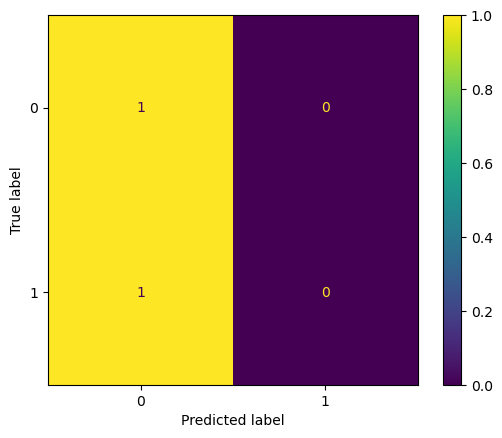

In [36]:
ConfusionMatrixDisplay.from_predictions(y_data, y_base, normalize = 'true')

## 5. Cross validation with unregularized model

**[5.1]** Cross-validation recall score

In [37]:
val_scores = cross_validate(LogisticRegression(max_iter = 1500, solver = 'sag', penalty='none'), X_data, y_data, cv=cv, scoring=['recall', 'precision'])

**[5.2]** Average recall and precision of all cv

In [38]:
avg_val_scores = {metric:np.mean(scores) for (metric, scores) in val_scores.items()}
avg_val_scores

{'fit_time': 14.480507612228394,
 'score_time': 0.03283500671386719,
 'test_recall': 0.2215122470713525,
 'test_precision': 0.8313914332662687}

**[5.3]** Average cross-validated scores of all cv

In [39]:
test_recall = val_scores['test_recall']
test_precision = val_scores['test_precision']
test_f2 = (5 * test_recall * test_precision) / (4 * test_precision + test_recall)
print('Precision (unregularized cross-val): ', np.mean(test_precision))
print('Recall (unregularized cross-val): ', np.mean(test_recall))
print('F2 (unregularized cross-val): ', np.mean(test_f2))

Precision (unregularized cross-val):  0.8313914332662687
Recall (unregularized cross-val):  0.2215122470713525
F2 (unregularized cross-val):  0.25953828847259536


## 6. Hyperparameter tuning with GridSearch

**[6.1]** Create a dictionary containing the grid search parameters

In [40]:
hyperparams_grid = {
    'C': [0.5, 1, 2, 4, 8],
    'l1_ratio': [0, 0.5, 1] # l1_ratio 0 is equivalent to l2, l1_ratio 1 is equivalent to l1, l1_ratio 0.5 is equivalent elasticnet
    }
hyperparams_grid

{'C': [0.5, 1, 2, 4, 8], 'l1_ratio': [0, 0.5, 1]}

**[6.2]** Instantiate a GridSearchCV with the hyperparameter grid and the logistic regression 

In [41]:
grid_search_log = GridSearchCV(LogisticRegression(max_iter = 1500, solver = 'saga', penalty='elasticnet'), hyperparams_grid, cv=cv, verbose = 1, scoring='recall')

**[6.3]** Fit the GridSearchCV on the training set

In [42]:
grid_search_log.fit(X_data, y_data)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


GridSearchCV(cv=[(array([     0,      1,      2, ..., 105064, 105065, 105068]),
                  array([     3,      5,      9, ..., 105063, 105066, 105067])),
                 (array([     0,      2,      3, ..., 105066, 105067, 105068]),
                  array([     1,      4,      6, ..., 105057, 105060, 105064])),
                 (array([     1,      3,      4, ..., 105064, 105066, 105067]),
                  array([     0,      2,      7, ..., 105061, 105065, 105068]))],
             estimator=LogisticRegression(max_iter=1500, penalty='elasticnet',
                                          solver='saga'),
             param_grid={'C': [0.5, 1, 2, 4, 8], 'l1_ratio': [0, 0.5, 1]},
             scoring='recall', verbose=1)

**[6.4]** Display the best set of parameters

In [43]:
grid_search_log.best_params_

{'C': 4, 'l1_ratio': 0}

**[6.5]** Mean cross-validated score of the best_estimator

In [44]:
grid_search_log.best_score_

0.22115725949591766

## 7. Select the best threshold for the best model 

**[7.1]** Train the model with best set of hyperparameters on training set 

In [45]:
log_none_reg = LogisticRegression(max_iter = 1500, solver = 'saga', penalty='none').fit(X_data, y_data)

**[7.2]** Predict the target using log_none_reg 

In [46]:
y_train_preds = log_none_reg.predict(X_data)

**[7.3]** Print precision, recall, and f2 score on training set

In [47]:
precision_train = precision_score(y_data, y_train_preds)
print('Precision (train): ', precision_train)
recall_train = recall_score(y_data, y_train_preds)
print('Recall (train): ', recall_train)
f2_train = fbeta_score(y_data, y_train_preds, beta = 2)
print('F2 (train): ', f2_train)

Precision (train):  0.8361955085865258
Recall (train):  0.22470713525026625
F2 (train):  0.2632016632016632


**[7.4]** Find threshold that return the best recall score for L2 model

In [48]:
# Retrieve the predicted probalitities on the train set
y_train_preds_prob = log_none_reg.predict_proba(X_data)
# Retrieve the probalitities for positive predictions on the train set
y_train_preds_prob_pos = [probs[1] for probs in y_train_preds_prob]
# Compute precision-recall pairs for different thresholds
precisions_train, recalls_train, thresholds_train = precision_recall_curve(y_data, y_train_preds_prob_pos)

# Compute F2 scores for all precision-recall pairs
f2_scores = (5*precisions_train*recalls_train) / (4*precisions_train + recalls_train)
# Index of highest F2 score 
highest_f2_idx = np.argmax(f2_scores)
# Best F2
print('Best F2: ', f2_scores[highest_f2_idx])
# Threshold that produces the highest f2 score
print('Best threshold: ', thresholds_train[highest_f2_idx])
# Precision that produces the highest f2 score
print('Precision: ', precisions_train[highest_f2_idx])
# Recalls that produces the highest f2 score
print('Recall: ', recalls_train[highest_f2_idx])

Best F2:  0.495675534006028
Best threshold:  0.1413680880546772
Precision:  0.3788182273410115
Recall:  0.5370962016329428


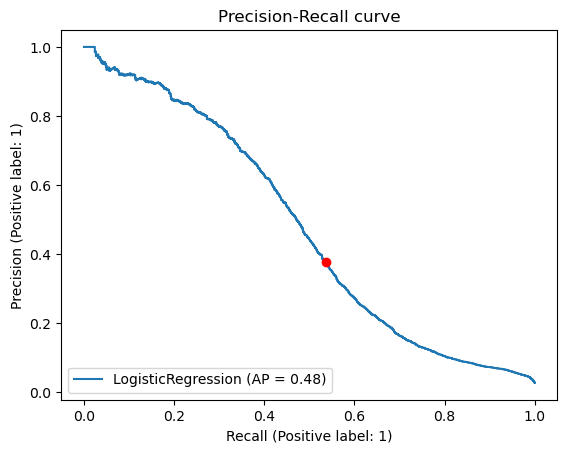

In [49]:
# Display PrecisionRecall curve. The red light is precision-recall pair that produces the highest recall
display = PrecisionRecallDisplay.from_estimator(log_none_reg, X_data, y_data)
_ = display.ax_.set_title("Precision-Recall curve")
plt.plot(recalls_train[highest_f2_idx], precisions_train[highest_f2_idx], 'ro')
plt.show()

## 8. Assess the best Logistic Regression Model on testing set

**[8.1]** Retrieve the predicted probalitities on the testing set

In [50]:
y_test_preds_prob = log_none_reg.predict_proba(X_test)

**[8.2]** Retrieve the probalitities for positive predictions on the testing set

In [51]:
y_test_preds_prob_pos = y_test_preds_prob[:, 1]

**[8.3]** Use the best threshold to convert probabilities to classes.

In [52]:
y_test_preds = [1 if prob >= thresholds_train[highest_f2_idx] else 0 for prob in y_test_preds_prob_pos]

**[8.4]** Print f2, precision and recall on testing set

In [53]:
precision_test = precision_score(y_test, y_test_preds)
print('Precision (test): ', precision_test)
recall_test = recall_score(y_test, y_test_preds)
print('Recall (test): ', recall_test)
f2_test = fbeta_score(y_test, y_test_preds, beta = 2)
print('F2 (test): ', f2_test)

Precision (test):  0.3633720930232558
Recall (test):  0.5326704545454546
F2 (test):  0.4872661122661123


**[8.5]** Confusion matrix on testing set

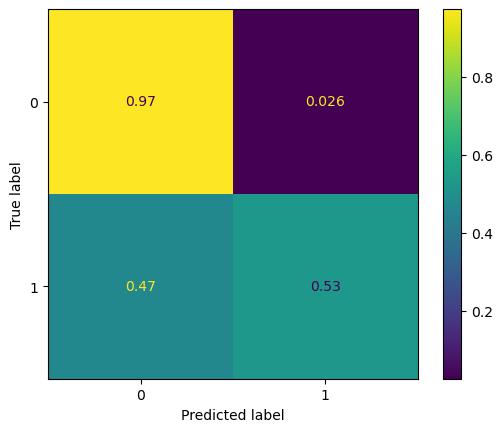

In [54]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_preds, normalize = 'true')